In [102]:

# importing required libraries
import datetime
import timestamp
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import pickle
import os

In [103]:
# setting figure size
rcParams['figure.figsize'] = 20, 10
scaler = MinMaxScaler(feature_range=(0, 1))


# read the file
df=pd.read_csv('C:/Users/Indium Software/Desktop/Idart/sample.csv')
print(df.shape)
# print the head
df.head()

# creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0, len(df)), columns=['date', 'close'])
for i in range(0, len(data)):
    new_data['date'][i] = data['date'][i]
    new_data['close'][i] = data['close'][i]


# setting index
new_data.index = new_data.date
new_data.drop('date', axis=1, inplace=True)
print(new_data.shape)
# creating train and test sets
dataset = new_data.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

train = scaled_data[0:1600, :]
test = scaled_data[1600:, :]

# converting dataset into x_train and y_train

x_train, y_train = [], []
for i in range(60, len(train)):
    x_train.append(train[i - 60:i, 0])
    y_train.append(train[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
print(x_train.shape)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))



(2000, 7)
(2000, 1)
(1540, 60)


C:\Users\Indium Software\Anaconda2\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [22]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=10, batch_size=1, verbose=2)

Epoch 1/10
 - 77s - loss: 0.0036
Epoch 2/10
 - 80s - loss: 8.7510e-04
Epoch 3/10
 - 81s - loss: 6.9834e-04
Epoch 4/10
 - 83s - loss: 5.0805e-04
Epoch 5/10
 - 84s - loss: 3.9758e-04
Epoch 6/10
 - 82s - loss: 4.0821e-04
Epoch 7/10
 - 110s - loss: 3.3788e-04
Epoch 8/10
 - 109s - loss: 3.3331e-04
Epoch 9/10
 - 81s - loss: 4.0490e-04
Epoch 10/10
 - 81s - loss: 3.2031e-04


In [23]:
outfile = open('C:/Users/Indium Software/Desktop/Idart/10_e_pred','wb')
saved_model = pickle.dump(model,outfile)
outfile.close()

In [94]:
infile = open('C:/Users/Indium Software/Desktop/Idart/10_e_pred','rb')
model = pickle.load(infile)

In [95]:
test_data_ut = new_data[len(new_data) - len(test) - 60:].values
#test_data = test_data.reshape(-1, 1)
test_data = scaler.transform(test_data_ut)
print(test_data.shape)


X_test=[]

for i in range(60, test_data.shape[0]):
    X_test.append(test_data[i - 60:i, 0])

X_test = np.array(X_test)
print(X_test.shape)


X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
closing_price = model.predict(X_test)

closing_price = scaler.inverse_transform(closing_price)
print(closing_price.shape)
print(type(closing_price))


(460, 1)
(400, 60)
(400, 1)
<class 'numpy.ndarray'>


In [62]:
df_tmp=df.copy()
df_tmp['date']=pd.to_datetime(df_tmp['date'])

#Train data
df1=df_tmp[['date','close']][:1600]

#Test data
df2=df_tmp[['date','close']][1600:]
df2['close']=closing_price

In [63]:
df_final=pd.concat([df1,df2])
df_final=df_final.reset_index(drop=True)
df_final['date']=df_final['date'].astype(str)

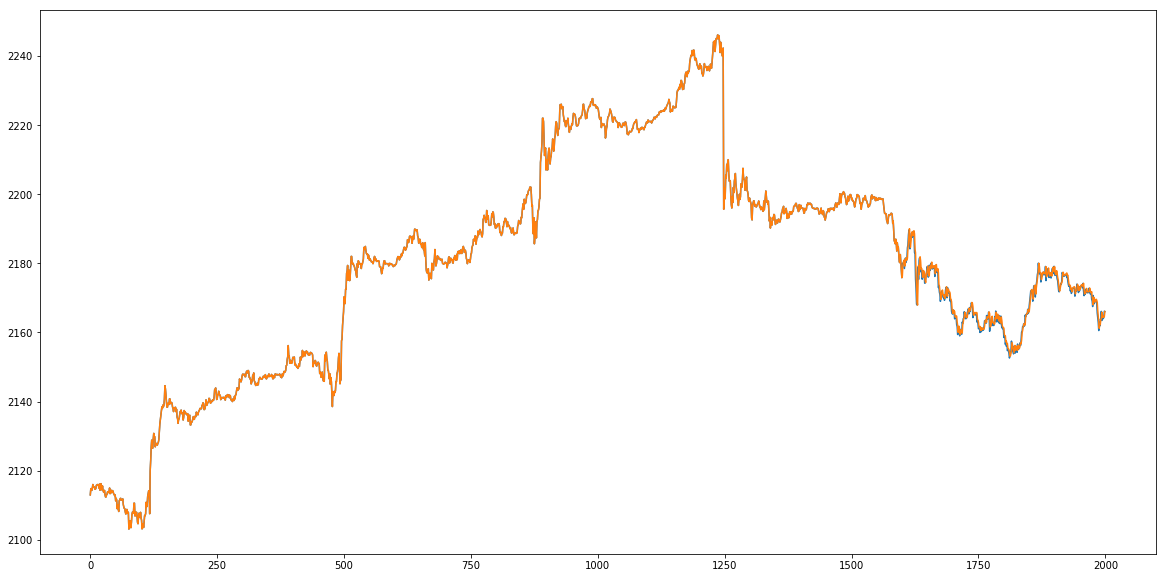

In [64]:
plt.plot(df[['close']])
plt.plot(df_final[['close']])

In [28]:
from matplotlib import pyplot as plt

plt.savefig('train_test_predictions_5.png')

<Figure size 1440x720 with 0 Axes>

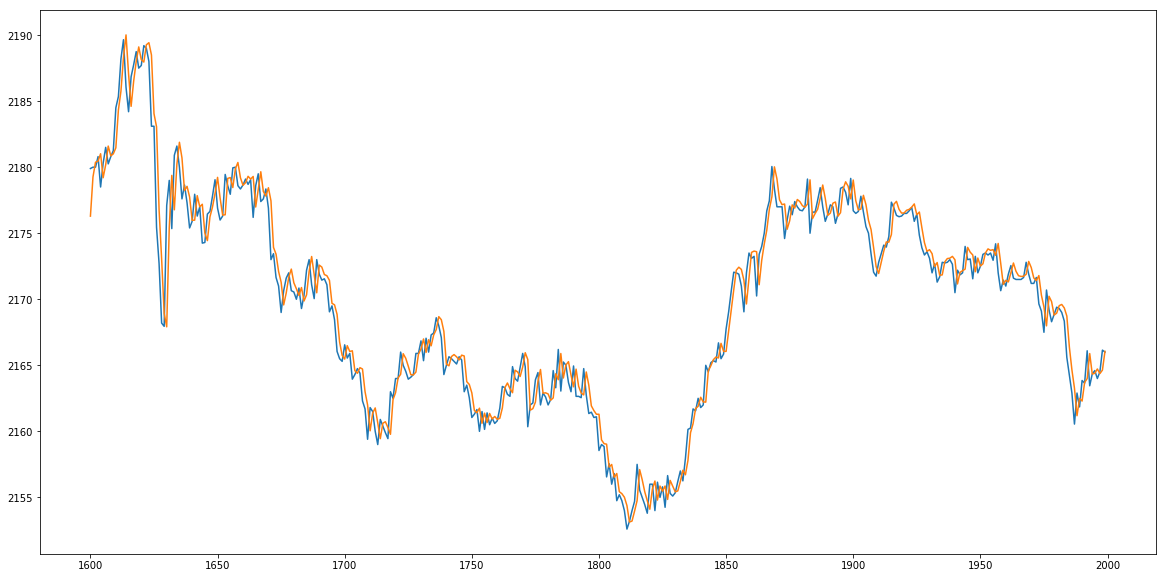

In [65]:
plt.plot(df[['close']].iloc[1600:,])
plt.plot(df_final[['close']].iloc[1600:,])

In [29]:
from matplotlib import pyplot as plt

plt.savefig('train_test_predictions_5_test.png')

<Figure size 1440x720 with 0 Axes>

In [98]:
# evaluate the persistence model

to_predict_ut = test_data_ut[-60:]
to_predict = scaler.transform(to_predict_ut)
print(to_predict.shape)

to_predict=np.reshape(to_predict,(1,to_predict.shape[0],1))
print(to_predict.shape)


(60, 1)
(1, 60, 1)


In [99]:
X_predictions = []

for i in range(0, 60):
    predictions = model.predict(to_predict)

    X_predictions.append(predictions[0][0])
    print(predictions)
    print(type(predictions))
    print(predictions.shape)
    predictions=scaler.inverse_transform(predictions)
    print(predictions)

    to_predict_ut=to_predict_ut[1:]
    print(to_predict_ut.shape)
    print(to_predict_ut)
    #to_predict1 = np.insert(to_predict1,59,predictions[0][0],axis=0)
    to_predict_ut=np.insert(to_predict_ut,59,predictions[0][0],axis=0)
    print(to_predict_ut.shape)
    
    to_predict = scaler.transform(to_predict_ut)
    to_predict=np.reshape(to_predict,(1,to_predict.shape[0],1))
    
X_predictions = np.array(X_predictions).reshape(-1, 1)
X_predictions = scaler.inverse_transform(X_predictions)
print(X_predictions.shape)

[[0.44240943]]
<class 'numpy.ndarray'>
(1, 1)
[[2166.3645]]
(59, 1)
[[2172.2]
 [2171.85]
 [2172.0]
 [2174.0]
 [2173.0]
 [2173.05]
 [2171.55]
 [2173.25]
 [2172.0]
 [2172.5]
 [2173.4]
 [2173.5]
 [2173.35]
 [2173.5]
 [2172.95]
 [2174.2]
 [2172.0]
 [2170.65]
 [2171.45]
 [2171.0]
 [2171.9]
 [2172.55]
 [2171.6]
 [2171.5]
 [2171.5]
 [2171.5]
 [2171.65]
 [2172.8]
 [2171.9]
 [2171.2]
 [2171.2]
 [2171.65]
 [2169.65]
 [2169.1]
 [2167.5]
 [2170.7]
 [2169.2]
 [2168.3]
 [2168.85]
 [2169.4]
 [2169.3]
 [2169.0]
 [2168.35]
 [2165.6]
 [2164.25]
 [2162.9]
 [2160.55]
 [2162.9]
 [2161.85]
 [2163.85]
 [2163.65]
 [2166.1]
 [2163.45]
 [2164.35]
 [2164.6]
 [2164.0]
 [2164.5]
 [2166.15]
 [2166.0]]
(60, 1)
[[0.4441952]]
<class 'numpy.ndarray'>
(1, 1)
[[2166.6199]]
(59, 1)
[[2171.85]
 [2172.0]
 [2174.0]
 [2173.0]
 [2173.05]
 [2171.55]
 [2173.25]
 [2172.0]
 [2172.5]
 [2173.4]
 [2173.5]
 [2173.35]
 [2173.5]
 [2172.95]
 [2174.2]
 [2172.0]
 [2170.65]
 [2171.45]
 [2171.0]
 [2171.9]
 [2172.55]
 [2171.6]
 [2171.5]
 [217

In [91]:
df_tmp=df.copy()
df_tmp['date']=pd.to_datetime(df_tmp['date'])

df1=df_tmp[['date','close']][:1600]
df2=df_tmp[['date','close']][1600:]
#print(df2.head())
df2['close']=closing_price
#print(df2.head())
df3=df_tmp[['date','close']][-300:]
df3['date']=df3['date']+pd.to_timedelta(5, unit='h')
df3['close']=X_predictions
df_final=pd.concat([df1,df2,df3])
df_final=df_final.reset_index(drop=True)
df_final['date']=df_final['date'].astype(str)

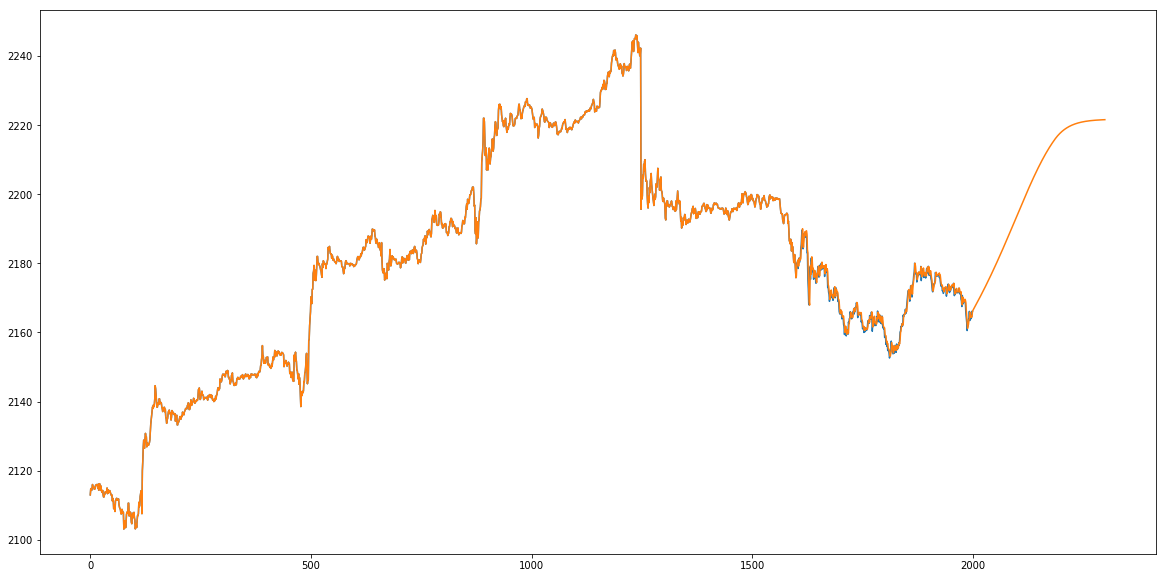

In [92]:
plt.plot(df[['close']])
plt.plot(df_final[['close']])

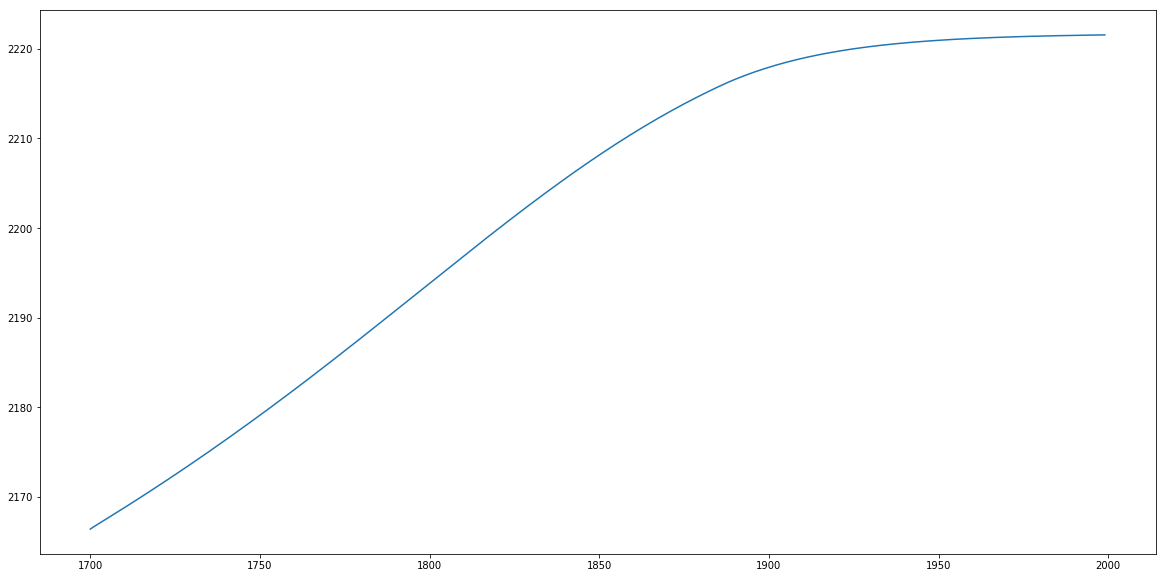

In [93]:
plt.plot(df3['close'])

In [100]:
X_predictions

array([[2166.3645],
       [2166.6199],
       [2166.8552],
       [2167.085 ],
       [2167.3154]], dtype=float32)